### 1) Problem Statement

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.



### Tasks to Solve :
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("./resources/csv/15-Travel.csv")

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Cleaning
- Understand the Dataset
- Handle Missing Values
- Handle Handling Duplicates
- Check Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Check for Value spelling issues for eg: Female is written as Fe male also in the dataset, we need to fix such type of issues

In [4]:
def checkForUniqueColumnValuesForStringDtype():
  for columns in df.columns:
    if(df[columns].dtype == object):
      print('Column Name: ', columns)
      print(df[columns].value_counts())
      print('===============================')

checkForUniqueColumnValuesForStringDtype()

Column Name:  TypeofContact
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
Column Name:  Occupation
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Column Name:  Gender
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
Column Name:  ProductPitched
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
Column Name:  MaritalStatus
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
Column Name:  Designation
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


In [5]:
## Fix Gender Female Spelling issue
df['Gender'] = df['Gender'].replace("Fe Male", "Female")

## In MaritalStatus Single and Unmarried are same so we can club it
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [6]:
checkForUniqueColumnValuesForStringDtype()

Column Name:  TypeofContact
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
Column Name:  Occupation
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Column Name:  Gender
Gender
Male      2916
Female    1972
Name: count, dtype: int64
Column Name:  ProductPitched
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
Column Name:  MaritalStatus
MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64
Column Name:  Designation
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


### Check for Missing Values

In [7]:
feature_with_na = df.isnull().sum()
feature_with_na = feature_with_na[feature_with_na > 0]

print(feature_with_na)

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64


In [8]:
column_index_with_na = feature_with_na.index
print(df[column_index_with_na].describe())

               Age  DurationOfPitch  NumberOfFollowups  PreferredPropertyStar  \
count  4662.000000      4637.000000        4843.000000            4862.000000   
mean     37.622265        15.490835           3.708445               3.581037   
std       9.316387         8.519643           1.002509               0.798009   
min      18.000000         5.000000           1.000000               3.000000   
25%      31.000000         9.000000           3.000000               3.000000   
50%      36.000000        13.000000           4.000000               3.000000   
75%      44.000000        20.000000           4.000000               4.000000   
max      61.000000       127.000000           6.000000               5.000000   

       NumberOfTrips  NumberOfChildrenVisiting  MonthlyIncome  
count    4748.000000               4822.000000    4655.000000  
mean        3.236521                  1.187267   23619.853491  
std         1.849019                  0.857861    5380.698361  
min         1.

##### Note that: As means and 50% percentile Quantile is almost near i.e there is not much difference then we can say that we dont have outliers

#### Handling NaN values
- For Continous Values we use : MEDIAN
- For Categorical features we use : MODE

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].median(), inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].median(), inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [10]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [11]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


#### Remove unnecessary features

##### Cutomer id is not required so we can drop it

In [12]:
df.drop('CustomerID',axis=1, inplace=True)

- feature NumberOfPersonVisiting means Total number of persons planning to take the trip with the customer
- So feature NumberOfChildrenVisiting ll mean the same 


i.e. NumberOfPersonVisiting + NumberOfChildrenVisiting ll give us total number of people travelling

In [13]:
df['TotalPersonVisiting'] = df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']

df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis=1, inplace=True)

#### Differentiate different Types of Data


In [14]:
## Numerical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 
## Categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O'] 

## Discrete Features: def: A Discrete variable can take only a specific value amongst the set of all possible values or in other words,
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]

## Continous Features
continous_features = [feature for feature in num_features if feature not in discrete_features]

print('Number of Numerical Feature = ', len(num_features))
print('Number of Categorical Feature = ', len(cat_features))
print('Number of Discrete Feature = ', len(discrete_features))
print('Number of Continous Feature = ', len(continous_features))

Number of Numerical Feature =  12
Number of Categorical Feature =  6
Number of Discrete Feature =  9
Number of Continous Feature =  3


In [15]:
## Divide the features into independent or say input features and dependent features or say op features
X = df.drop('ProdTaken', axis=1)
y=df['ProdTaken']

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [17]:
x_cat_features = X.select_dtypes(include='object').columns
x_num_features = X.select_dtypes(exclude='object').columns

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_transformer = OneHotEncoder(drop='first')
numeric_tranformer = StandardScaler()

preprocess = ColumnTransformer([
  ("OneHotEncoder", categorical_transformer, x_cat_features),
  ("StandardScaler", numeric_tranformer, x_num_features) ## this is not required we are applying just to understand ColumnTranfer
])

In [19]:
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)

## Machine Learning

In [20]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [21]:
models = {
  "DecisionTreeClassifier": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoostClassifier": AdaBoostClassifier(),
  "GradientBoostingClassifier": GradientBoostingClassifier(),
  "XgBoost": XGBClassifier()
}

for keys,model in models.items():
  model.fit(X_train, y_train) ## Train model


  ## Make Prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  ## Check Training set Performance
  model_train_accuracy = accuracy_score(y_train, y_train_pred)
  model_train_f1_score = f1_score(y_train, y_train_pred)
  model_train_precision_score = precision_score(y_train, y_train_pred)
  model_train_recall_score = recall_score(y_train, y_train_pred)
  model_train_roc_curve = roc_curve(y_train, y_train_pred)
  model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

   ## Check Test set Performance
  model_test_accuracy = accuracy_score(y_test, y_test_pred)
  model_test_f1_score = f1_score(y_test, y_test_pred)
  model_test_precision_score = precision_score(y_test, y_test_pred)
  model_test_recall_score = recall_score(y_test, y_test_pred)
  model_test_roc_curve = roc_curve(y_test, y_test_pred)
  model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

  print('\n')
  print(f"*********** {keys} ***********") ## Name of the model

  print("Model Performance")
  print("Accuracy Score: Train: {:.4f} || Test: {:.4f}". format(model_train_accuracy,model_test_accuracy))
  print("F1 Score: Train: {:.4f} || Test: {:.4f}". format(model_train_f1_score, model_test_f1_score))
  print("Precision Score: Train: {:.4f} || Test: {:.4f}". format(model_train_precision_score, model_test_precision_score))
  print("Recall Score: Train: {:.4f} || Test: {:.4f}". format(model_train_recall_score, model_test_recall_score))
  print("ROC AUC Score: Train: {:.4f} || Test: {:.4f}". format(model_train_roc_auc_score, model_test_roc_auc_score))
 

  print("==="*20)

  



*********** DecisionTreeClassifier ***********
Model Performance
Accuracy Score: Train: 1.0000 || Test: 0.9182
F1 Score: Train: 1.0000 || Test: 0.7838
Precision Score: Train: 1.0000 || Test: 0.8101
Recall Score: Train: 1.0000 || Test: 0.7592
ROC AUC Score: Train: 1.0000 || Test: 0.8580


*********** Random Forest ***********
Model Performance
Accuracy Score: Train: 1.0000 || Test: 0.9305
F1 Score: Train: 1.0000 || Test: 0.7875
Precision Score: Train: 1.0000 || Test: 0.9767
Recall Score: Train: 1.0000 || Test: 0.6597
ROC AUC Score: Train: 1.0000 || Test: 0.8279


*********** AdaBoostClassifier ***********
Model Performance
Accuracy Score: Train: 0.8565 || Test: 0.8354
F1 Score: Train: 0.4867 || Test: 0.4311
Precision Score: Train: 0.7308 || Test: 0.6630
Recall Score: Train: 0.3649 || Test: 0.3194
ROC AUC Score: Train: 0.6670 || Test: 0.6400


*********** GradientBoostingClassifier ***********
Model Performance
Accuracy Score: Train: 0.8939 || Test: 0.8589
F1 Score: Train: 0.6382 || Te

##### As we can see that Random forest has bit better result then decision tree then we can say go with Random forest for further implementaion

#### Hyperparament Tunning

In [22]:
# rf_params={
#   "max_depth": [5,8,15, None, 20 ],
#   "max_features": [5,7, "auto", 8 ],
#   "min_samples_split": [2,8,15, 20 ],
#   "n_estimators": [100,200,500,1000]
# }

## adaboost not giving good accuracy
# adaboost_params={
#   "n_estimators": [50,60,70,80,90],
# }

gradientBoost_params = {
  "loss" :["log_loss", "exponential"],
  "criterion": ["friedman_mse", "squared_error"],
  "max_features": ["sqrt", "log2"],
  "n_estimators": [100,200,500,1000],
  "max_depth": [5,8,10,15,None,20 ],
  
}

## Xgboost 
xgBoost_params = {
  "learning_rate" :[0.1,0.01],
  "max_depth": [5,8,12,20,30 ],
  "n_estimators": [100,200,300],
  "colsample_bytree": [0.5,0.8,1,0.3,0.4],
  
}

## Model List for HyperParameter Tunning 
random_cv_models = [
  # ("RF", RandomForestClassifier(), rf_params),
  # ("AD", AdaBoostClassifier(), adaboost_params),
  ("GB", GradientBoostingClassifier(), gradientBoost_params),
  ("Xg", XGBClassifier(), xgBoost_params)

]

In [23]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}

for name, model, params in random_cv_models:
  random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=2, n_jobs=-1)

  random.fit(X_train, y_train)
  model_params[name] = random.best_params_

  for mode_name in model_params:
    print(f"--------------Best Params for Model: {model} ----------------")
    print(model_params[mode_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, n_estimators=200; total time=   2.5s
[CV] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, n_estimators=200; total time=   2.5s
[CV] END criterion=friedman_mse, loss=exponential, max_depth=10, max_features=sqrt, n_estimators=200; total time=   2.7s
[CV] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, n_estimators=200; total time=   5.6s
[CV] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, n_estimators=200; total time=   5.8s
[CV] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, n_estimators=200; total time=   5.8s
[CV] END criterion=squared_error, loss=exponential, max_depth=15, max_features=sqrt, n_estimators=1000; total time=   6.2s
[CV] END criterion=squared_error, loss=exponential, max_depth=15, max_features=sqrt, n_estimators

In [24]:
models = {
  # "Random Forest": RandomForestClassifier(n_estimators= 500, min_samples_split= 2, max_features= 8, max_depth= None),
  # "AdaBoostClassifier": AdaBoostClassifier(n_estimators=80), ## not using as accuracy is low
  "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators= 1000, max_features= 'sqrt', max_depth= 8, loss= 'log_loss', criterion= 'friedman_mse'),
  "XGBClassifier": XGBClassifier(n_estimators= 300, max_depth= 12, learning_rate= 0.1, colsample_bytree= 1)
}

for keys,model in models.items():
  model.fit(X_train, y_train) ## Train model


  ## Make Prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  ## Check Training set Performance
  model_train_accuracy = accuracy_score(y_train, y_train_pred)
  model_train_f1_score = f1_score(y_train, y_train_pred)
  model_train_precision_score = precision_score(y_train, y_train_pred)
  model_train_recall_score = recall_score(y_train, y_train_pred)
  model_train_roc_curve = roc_curve(y_train, y_train_pred)
  model_train_roc_auc_score = roc_auc_score(y_train, y_train_pred)

   ## Check Test set Performance
  model_test_accuracy = accuracy_score(y_test, y_test_pred)
  model_test_f1_score = f1_score(y_test, y_test_pred)
  model_test_precision_score = precision_score(y_test, y_test_pred)
  model_test_recall_score = recall_score(y_test, y_test_pred)
  model_test_roc_curve = roc_curve(y_test, y_test_pred)
  model_test_roc_auc_score = roc_auc_score(y_test, y_test_pred)

  print('\n')
  print(f"*********** {keys} ***********") ## Name of the model

  print("Model Performance")
  print("Accuracy Score: Train: {:.4f} || Test: {:.4f}". format(model_train_accuracy,model_test_accuracy))
  print("F1 Score: Train: {:.4f} || Test: {:.4f}". format(model_train_f1_score, model_test_f1_score))
  print("Precision Score: Train: {:.4f} || Test: {:.4f}". format(model_train_precision_score, model_test_precision_score))
  print("Recall Score: Train: {:.4f} || Test: {:.4f}". format(model_train_recall_score, model_test_recall_score))
  print("ROC AUC Score: Train: {:.4f} || Test: {:.4f}". format(model_train_roc_auc_score, model_test_roc_auc_score))
 

  print("==="*20)

  



*********** GradientBoostingClassifier ***********
Model Performance
Accuracy Score: Train: 1.0000 || Test: 0.9519
F1 Score: Train: 1.0000 || Test: 0.8630
Precision Score: Train: 1.0000 || Test: 0.9737
Recall Score: Train: 1.0000 || Test: 0.7749
ROC AUC Score: Train: 1.0000 || Test: 0.8849


*********** XGBClassifier ***********
Model Performance
Accuracy Score: Train: 1.0000 || Test: 0.9519
F1 Score: Train: 1.0000 || Test: 0.8653
Precision Score: Train: 1.0000 || Test: 0.9557
Recall Score: Train: 1.0000 || Test: 0.7906
ROC AUC Score: Train: 1.0000 || Test: 0.8908


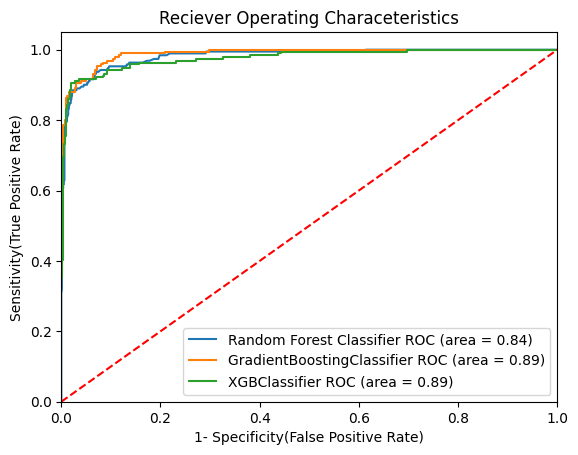

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve

## PLot ROC AUC Curve
plt.figure()

## Add the model to the list you want to view on the ROC plot
auc_models = [
  {
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators= 500, min_samples_split= 2, max_features= 8, max_depth= None),
    'auc': 0.8404
  }, 
  # {
  #   'label': 'ADA BoostClassifier',
  #   'model':  AdaBoostClassifier(n_estimators=80),
  #   'auc': 0.6049
  # },
  {
    'label': 'GradientBoostingClassifier',
    'model': GradientBoostingClassifier(n_estimators= 1000, max_features= 'sqrt', max_depth= 8, loss= 'log_loss', criterion= 'friedman_mse'),
    'auc': 0.8947
  }, 
  {
    'label': 'XGBClassifier',
    'model': XGBClassifier(n_estimators= 300, max_depth= 12, learning_rate= 0.1, colsample_bytree= 1),
    'auc': 0.8908
  }, 
]

## create a loop through all the models
for algo in auc_models:
  model = algo['model'] # select the model
  model.fit(X_train, y_train) # train the model
  #Comput False positive rate, True positive rate
  fpr,tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])


  #Calculate Area under the curve to display on the plot
  plt.plot(fpr, tpr, label = '%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Customize setting for plot
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel("1- Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.title("Reciever Operating Characeteristics")
plt.legend(loc='lower right')
plt.show()